## Boston House Prices Dataset - An Investigation

### Introduction

The Boston Housing Data consists of information collected by the US Census Service on housing in the Boston, Massachusetts area in 1970 and contains [506 entries with 13 distinct categories](https://www.kaggle.com/c/boston-housing) of numerical data. After doing some [background reading](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155as) about the data set I discovered that it is included in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), the Python machine learning library, and can therefore be easily imported into this notebook to anaylse. 

In [1]:
##Importing dataset
from sklearn.datasets import load_boston ##https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
boston_dataset = load_boston()

##import the other libraries and packages required to analyse the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import pandas as pd
%matplotlib inline
## keras to be imported also



To take a first look at the data set we can use the below commands to ascertain the categories it holds. 

In [2]:
print (boston_dataset.keys()) #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print (boston_dataset.DESCR) #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Descriptive 
Descriptive statistics give a simple summary of a data set, and include such observations as [standard deviation, minimum, maximum and mean](https://en.wikipedia.org/wiki/Descriptive_statistics) for example.  By loading the Boston data set into a Pandas dataframe it is possible to use the [describe function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to summarise all columns and calculate some of these statistics - 

In [4]:
##load Boston dataset into Pandas dataframe https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
##summarise dataset
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


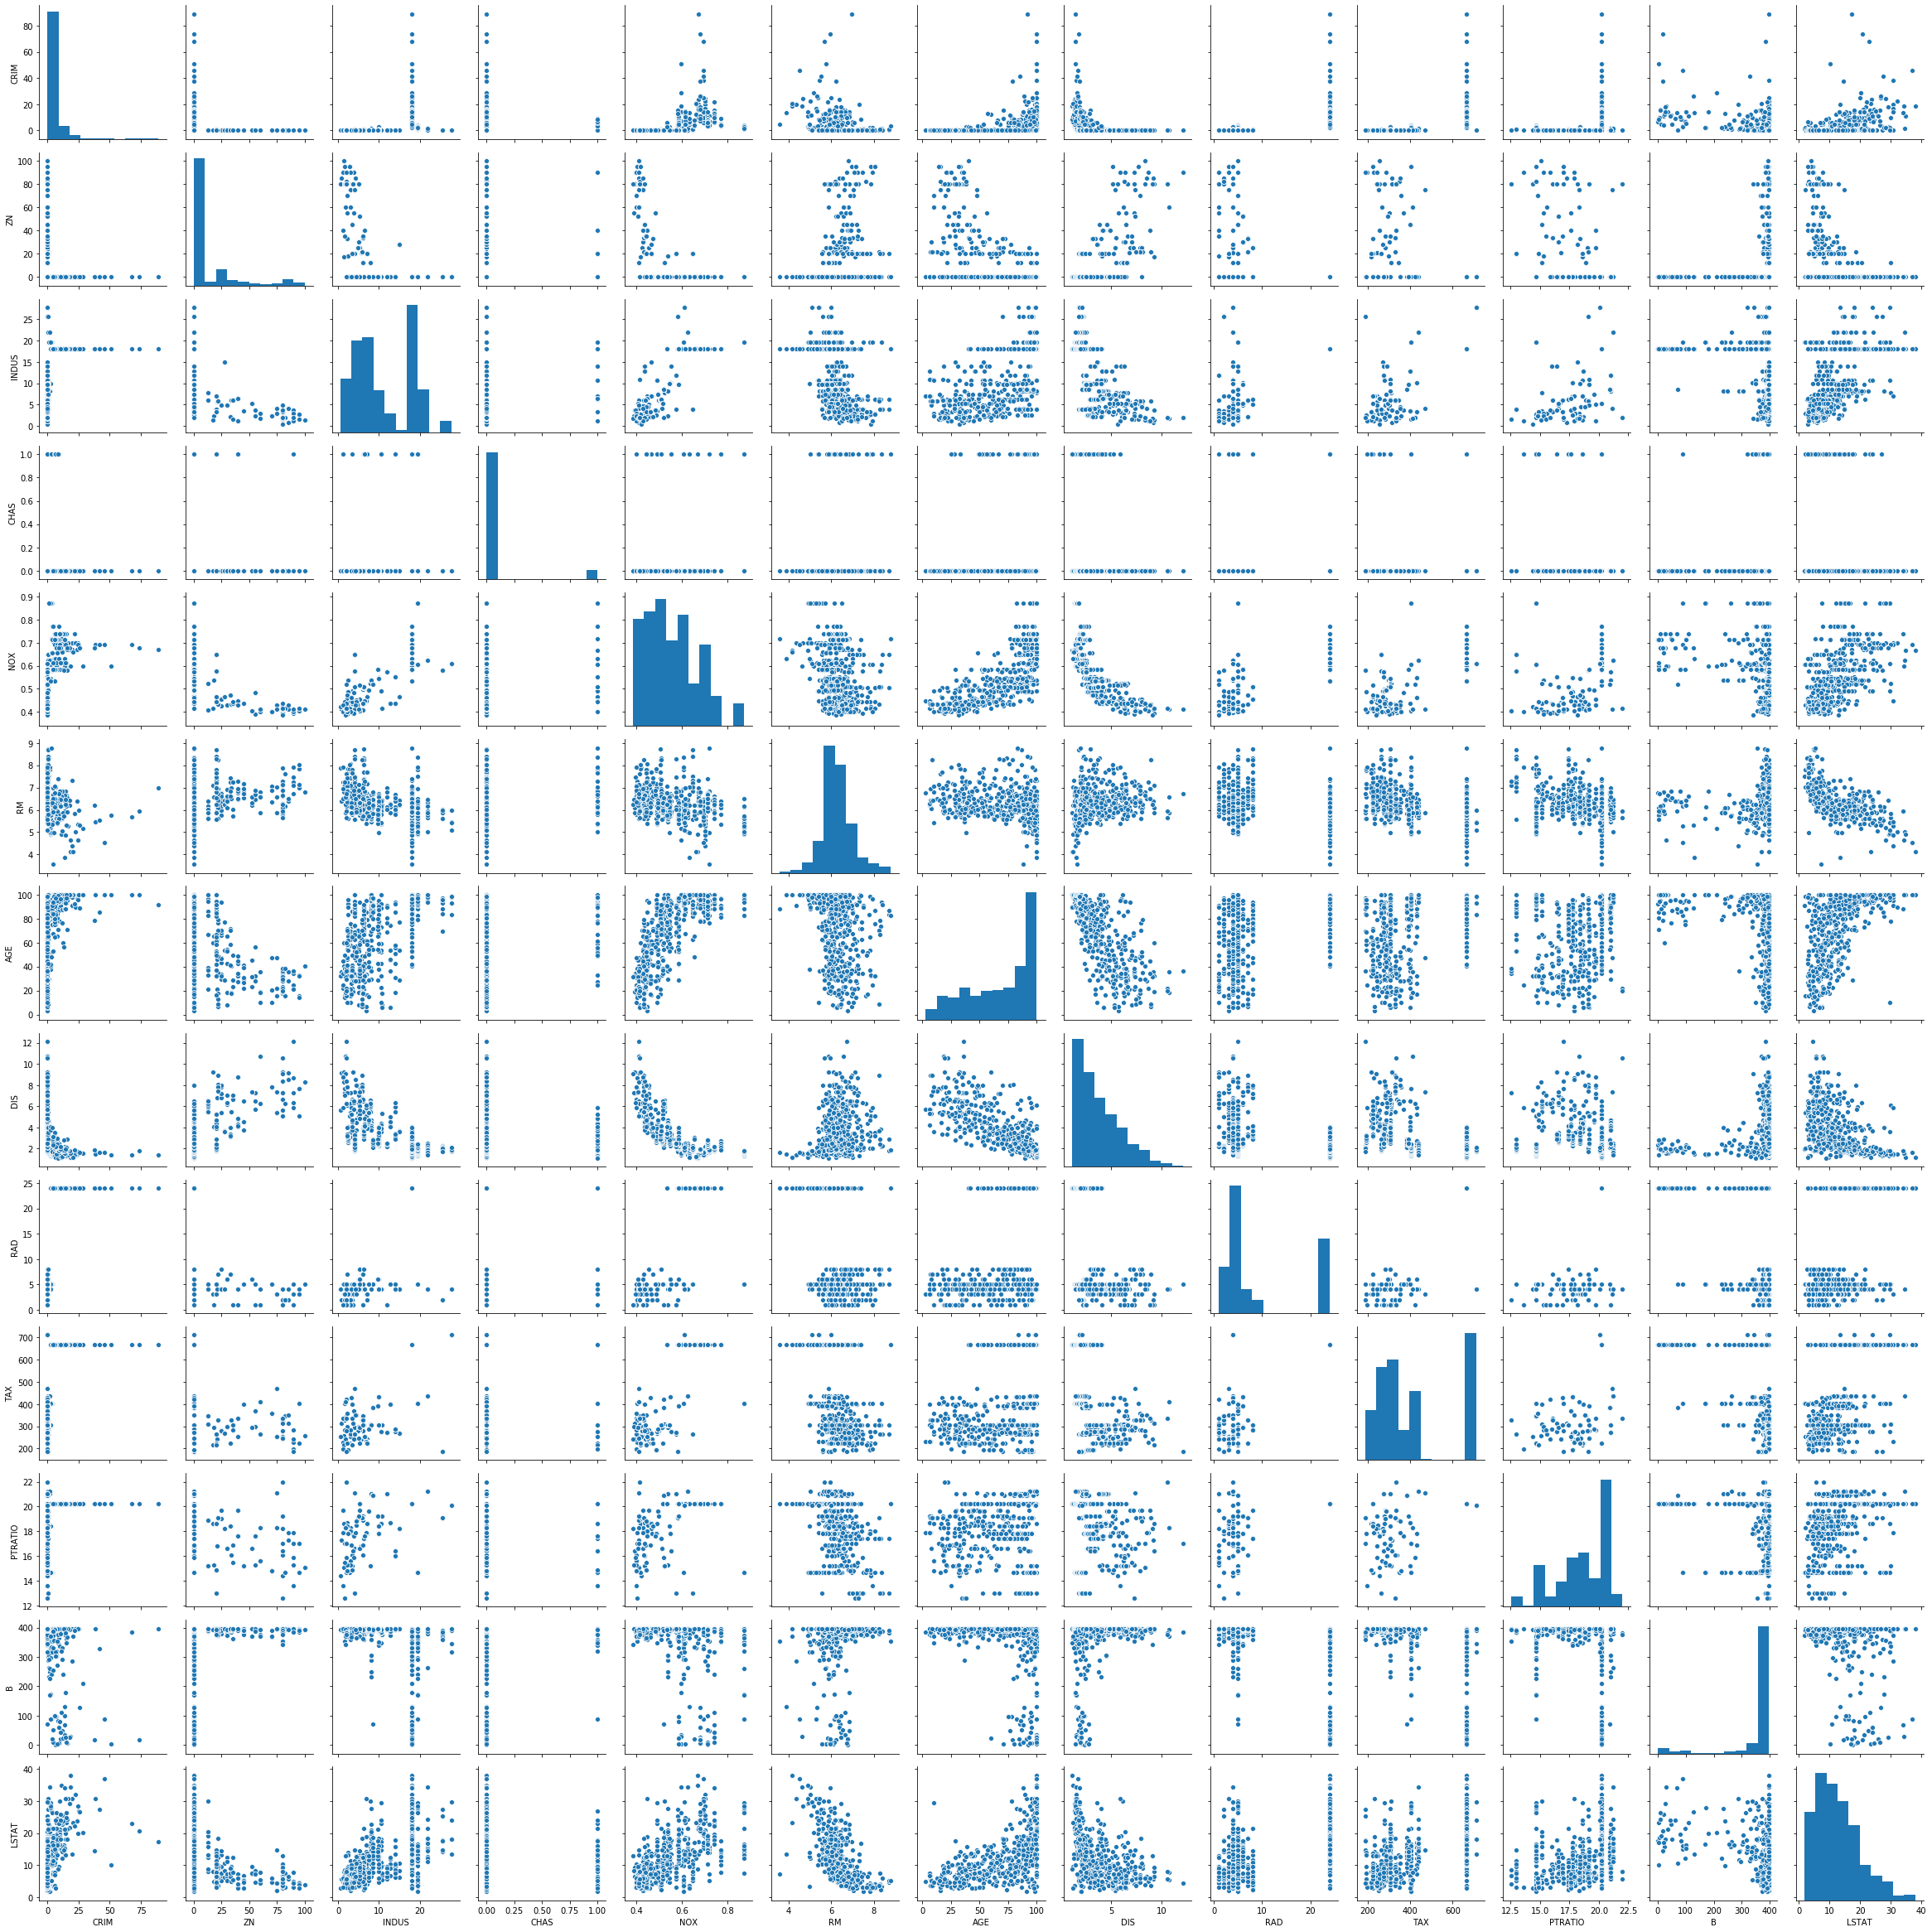

In [24]:
sns.pairplot(boston, height=2.5)
plt.tight_layout()

### Inferential Statistics

### References
1. https://www.kaggle.com/c/boston-housing
2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
4. https://en.wikipedia.org/wiki/Descriptive_statistics 